# Introduction to the Perceptron

In [52]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification


In [53]:
# creating the dataset
features, targets= make_classification(n_samples=50,
                                    n_features=5,
                                    n_informative=1,
                                    n_redundant=0,
                                    n_clusters_per_class=1,
                                    random_state=234)

# let put it into dataframe
df= pd.DataFrame(data=features,columns=["x1","x2","x3","x4","x5"])
df["targets"]=targets
df.head(5)

,x1,x2,x3,x4,x5,targets
0,-0.769768,0.009029,0.603762,1.802055,-1.959346,0
1,0.720000,-0.866800,-0.346685,2.059198,-0.255441,0
2,1.331346,-0.767476,0.903184,-0.634250,-1.250363,0
3,0.016714,-0.280828,-1.106712,-1.547362,1.003365,1
4,1.169775,-1.128784,0.321545,-0.668274,-1.341731,0


In [54]:
np.bincount(targets)

array([25, 25])

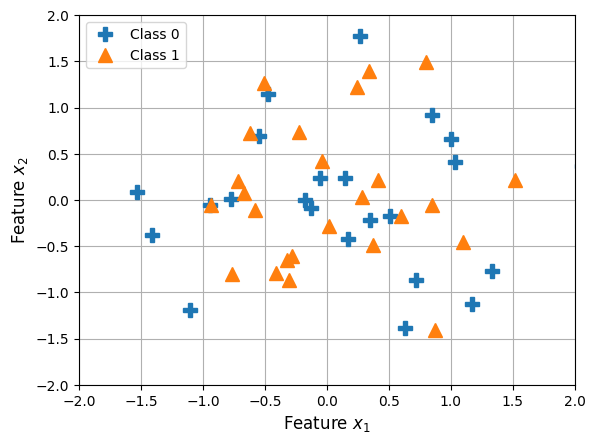

In [55]:
# let plot the data to show the linearly separable of it

plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker = 'P',
    markersize = 10,
    linestyle = '',
    label = 'Class 0'
    )
plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker = '^',
    markersize = 10,
    linestyle = '',
    label = 'Class 1')
plt.legend(loc = 2)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)
plt.grid()
plt.show()

## Implementing a Simple Perceptron from Scratch

In [56]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features=num_features
        self.weights=[0.0 for _ in range(num_features)]
        self.bias= 0
    def forward(self, x):
        weighted_sun_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sun_z+=x[i]*self.weights[i]

        if weighted_sun_z>0:
            prediction=1
        else:
            prediction=0

        return prediction
ppn= Perceptron(5)
x=[1.3,-1.5,0.9,-2.1,0.88]
ppn.forward(x)

0

## adding the update function

In [57]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features=num_features
        self.weights=[0.0 for _ in range(num_features)]
        self.bias= 0
    def forward(self, x):
        weighted_sun_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sun_z+=x[i]*self.weights[i]

        if weighted_sun_z>0:
            prediction=1
        else:
            prediction=0

        return prediction
    
    def update(self,x,y_true):
        prediction= self.forward(x)
        error= y_true - prediction

        self.bias+=error
        for i, _ in enumerate(self.weights):
            self.weights[i]+=error * x[i]
            return error

ppn=Perceptron(5)
x=[1.3,-1.5,0.9,-2.1,1.88]
ppn.update(x,y_true=1)

1

In [58]:
print("Model parameters:")
print("Weights:", ppn.weights)
print("Bias:", ppn.bias)

Model parameters:
Weights: [1.3, 0.0, 0.0, 0.0, 0.0]
Bias: 1


### Training the Perceptron

In [59]:
def train(model, X_train, y_train, epochs):
    # Training Loop
    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(X_train, y_train):
            error = model.update(x, y)
            error_count += abs(error)

        print(f"Epoch {epoch + 1} errors {error_count}")

In [60]:
ppn = Perceptron(num_features = 5)
train(ppn, features, targets, epochs = 5)

Epoch 1 errors 27
Epoch 2 errors 29
Epoch 3 errors 30
Epoch 4 errors 30
Epoch 5 errors 30


### Evaluate the Perceptron

In [ ]:
train_acc = compute_accuracy(ppn, features, targets)
print("Model Accuracy:", train_acc)